In [1]:
import os
from datetime import datetime as dt
import pandas as pd
import seaborn as sns
from tshistory.api import timeseries
import matplotlib.pyplot as plt
from BlueOcean import DataAccessApi
import statsmodels.formula.api as sm

# ## py 3.7
# from datagenic_rest_client.datagenic import DataGenic
# from DG import get_prices_df
# datagenic_rest_server = "http://lon-qdev-ap11"
# d = DataGenic(
#     url_rest_wrapper=datagenic_rest_server, datagenic_url=os.environ["datagenicserver"],
#   datagenic_username=os.environ["datagenicusername"], datagenic_password=os.environ["datagenicpassword"])
# %matplotlib inline

# py3.9.7
from ag_datagenic_rest_client import DataGenic
d = DataGenic.create_from_environment()

tsa = timeseries('http://tst-qdev-ap9.petroineos.local/api')

def bo_get_data(query):
    data = DataAccessApi.GetDataframe(query)
    return data

In [32]:
from yahoo_fin.stock_info import get_data

dollar = get_data('^NYICDX', start_date='01-01-2005')
spx = get_data('^GSPC', start_date='01-01-2005')
spx_m = spx.resample('MS').mean()
us10yr = get_data('^TNX', start_date='01-01-2005')
us5yr = get_data('^FVX', start_date='01-01-2005')

In [141]:
# ax1 = us10yr.close.plot()
# ax2 = ax1.twinx()
# m36_d.plot(ax=ax2, color='maroon')

In [173]:
daily_flat_price = pd.concat([dollar.close, spx.close, us5yr.close, m36_d], axis=1)
daily_flat_price.columns = ['dxy', 'spx', 'bond', 'm36']

In [148]:
daily_flat_price.dropna(inplace=True)

In [175]:
result = sm.ols(formula="m36 ~ bond", data=daily_flat_price).fit()
result.rsquared

0.00471657378877699

In [176]:
result = sm.ols(formula="m36 ~ spx + dxy + bond", data=daily_flat_price).fit()
result.rsquared

0.4991196985388522

In [2]:
brent = {"m1":"model://ICE_BRENT/EU.OIL.NSEA.ICE.BRENT.FUT.M01",
"m6":"model://ICE_BRENT/EU.OIL.NSEA.ICE.BRENT.FUT.M06",
"m12" : "model://ICE_BRENT/EU.OIL.NSEA.ICE.BRENT.FUT.M12",
"m36" : "model://ICE_BRENT/EU.OIL.NSEA.ICE.BRENT.FUT.M36"}

m1 = "model://ICE_BRENT/EU.OIL.NSEA.ICE.BRENT.FUT.M01"
m6 = "model://ICE_BRENT/EU.OIL.NSEA.ICE.BRENT.FUT.M06"
m12 = "model://ICE_BRENT/EU.OIL.NSEA.ICE.BRENT.FUT.M12"
m36 = "model://ICE_BRENT/EU.OIL.NSEA.ICE.BRENT.FUT.M36"
eu_fx = "model://IMF_FX/US.FX.IMF.EUR.USD.SPOT"
may_jun23 = "model://ICE_BRT_SP/EU.OIL.NSEA.ICE.BRENT.FUT.SP.2023M05_2023M06"
# brent_curve = get_prices_df(brent, dt(2005,1,1))

In [3]:
m36_d = d.get_time_series(m36, from_date=dt(2005,1,1), to_date=dt.today())

In [4]:
may_jun = d.get_time_series(may_jun23,from_date=dt(2023,2,1), to_date=dt(2023,4,1))

<Axes: title={'center': 'May/Jun ICE brent spread'}, xlabel='$/bbl'>

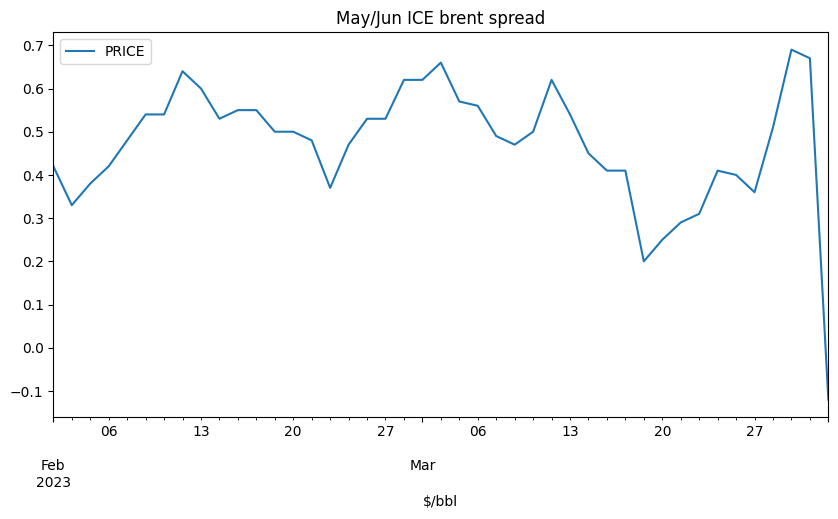

In [5]:
may_jun.plot(title = 'May/Jun ICE brent spread', xlabel='$/bbl', figsize=(10,5))

In [6]:
m1_m = d.get_time_series(m1, from_date=dt(2005,1,1), to_date=dt.today()).resample('MS').mean()
m6_m = d.get_time_series(m6, from_date=dt(2005,1,1), to_date=dt.today()).resample('MS').mean()
m12_m = d.get_time_series(m12, from_date=dt(2005,1,1), to_date=dt.today()).resample('MS').mean()
m36_m = d.get_time_series(m36, from_date=dt(2005,1,1), to_date=dt.today()).resample('MS').mean()

In [7]:
m6_spread = m1_m - m36_m

In [8]:
# commercial_stocks = tsa.get("crude.iea.oecd_total.commercial_stocks.kt.monthly")
commercial_stocks = tsa.get('crude.kpler.oecd_total.commercial_stocks.mb.daily').resample('MS').mean()
dxy = tsa.get('macro.dxy_index.daily').resample('MS').mean()

<Axes: xlabel='Time'>

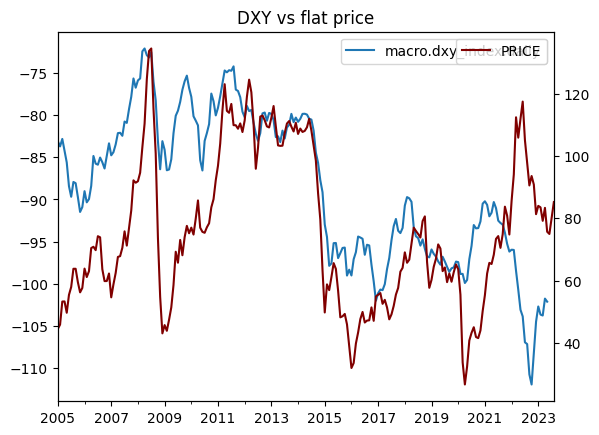

In [9]:
ax1 = (dxy*-1).plot(title='DXY vs flat price', legend=True)
ax2 = ax1.twinx()
m1_m.plot(ax=ax2, color='maroon')

NameError: name 'eur_usd' is not defined

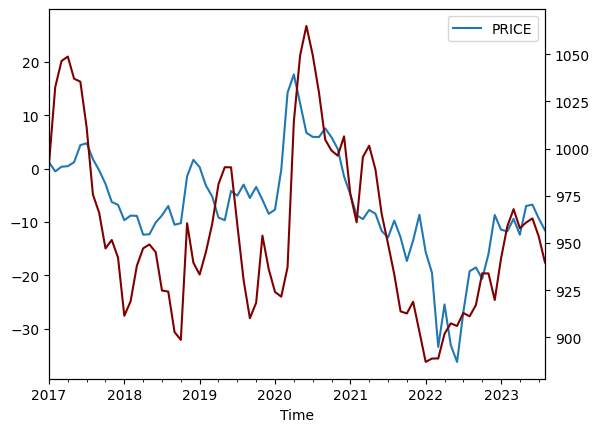

In [10]:
ax1 = (m6_spread*-1).plot()
ax2 = ax1.twinx()
commercial_stocks.plot(ax=ax2, color='maroon')

corr = pd.concat([m6_spread, commercial_stocks, eur_usd], axis=1)
corr.columns = ['spread', 'oecd_tot', 'eur_usd']
# corr = corr.loc['2016':]
result = sm.ols(formula="spread ~ oecd_tot + eur_usd", data=corr).fit()
result.rsquared

### global inventories vs Flat price and spreads
* OECDTOT inventories show good correlations

In [11]:
brent_m1 = tsa.get("price.platts.ice_brent_swap.m01.usd_bbl.daily")
brent_m1_m2 = tsa.get("price.platts.ice_brent_swap_spread.m01.usd_bbl.daily")
brent_m1_m2_m = brent_m1_m2.resample('MS').mean()
brent_m1_m = brent_m1.resample('MS').mean()

In [12]:
eu_stocks = tsa.get("crude.iea.oecd_europe.ending_stocks.kb.monthly")
# commercial_stocks = tsa.get("crude.iea.oecd_total.commercial_stocks.kt.monthly")
oecd_total_inventories = tsa.get('crude.iea.oecd_total.ending_stocks.kt.monthly')
oecd_total_strategic_inventories = tsa.get('crude.iea.oecd_total.strategic_stocks.kt.monthly')

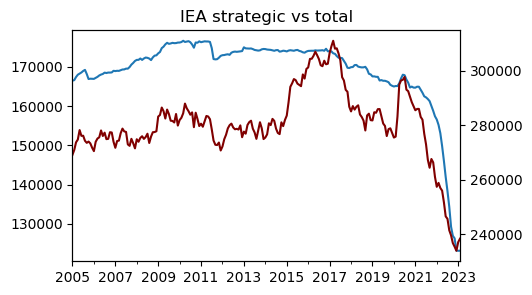

In [185]:
ax1 = oecd_total_strategic_inventories.plot(figsize=(5,3), title='IEA strategic vs total')
ax2 = ax1.twinx()
oecd_total_inventories.plot(ax=ax2, color='Maroon')

<Axes: >

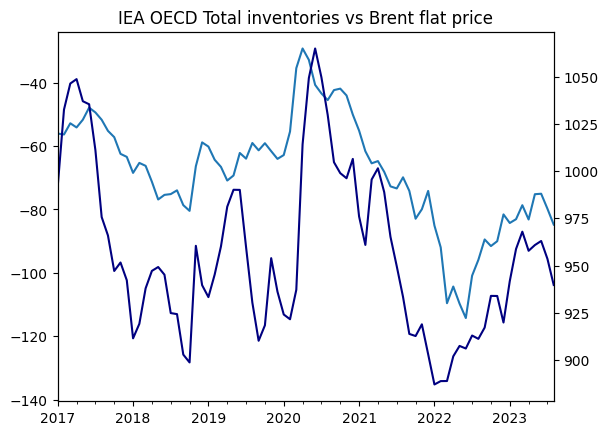

In [13]:
ax1 = (brent_m1_m*-1).plot(title='IEA OECD Total inventories vs Brent flat price')
ax2 = ax1.twinx()
commercial_stocks.plot(ax=ax2, color='navy')

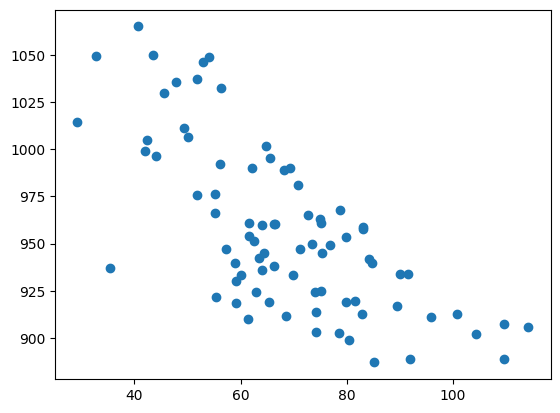

In [15]:
plt.scatter(brent_m1_m.loc[commercial_stocks.index], commercial_stocks)

<Axes: >

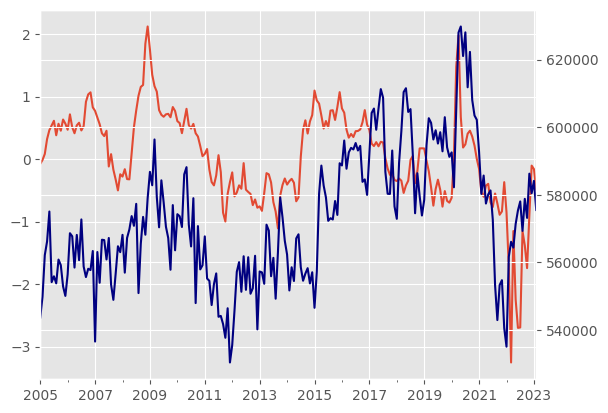

In [ ]:
ax1 = (brent_m1_m2_m*-1).plot()
ax2 = ax1.twinx()
eu_stocks.plot(ax=ax2, color='navy')

In [112]:
corr = pd.concat([brent_m1_m, brent_m1_m2_m, commercial_stocks, spx_m.close, dxy], axis=1)
corr.columns = ['flatty', 'spread', 'oecd_tot', 'spx', 'dxy']
# corr = corr.loc[:'2016']

In [113]:
result = sm.ols(formula="flatty ~ oecd_tot + dxy + spx", data=corr).fit()
result.rsquared

0.5524544612140028

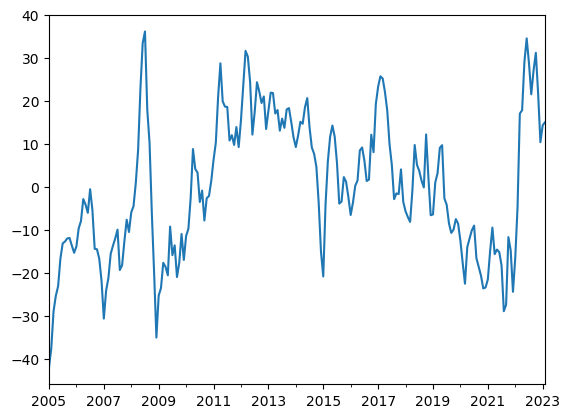

In [114]:
result.resid.plot()

<Axes: xlabel='date'>

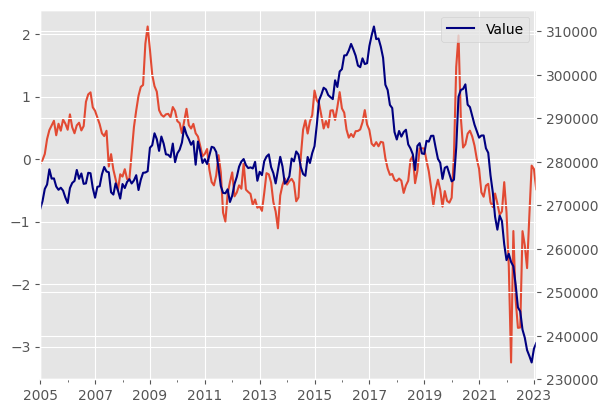

In [ ]:
ax1 = (brent_m1_m2_m*-1).plot()
ax2 = ax1.twinx()
oecd_total_inventories.plot(ax=ax2, color='navy')

Flat price vs spreads

In [2]:
model_dict = {
    'brentm1':"model://ICE_BRENT/EU.OIL.NSEA.ICE.BRENT.FUT.M01",
    'brentm2':"model://ICE_BRENT/EU.OIL.NSEA.ICE.BRENT.FUT.M02",
    # 'dfl':"model://PLATTS_DR/PLATTS.PET.DR.FWD.BRENT_DTFRT.M01/MID/ALL"
    }

In [4]:
swaps_dict = {
    'plattsm1':"model://PLATTS_DR/PLATTS.PET.DR.SWAP.BRENT_FRT.M01/MID/ALL",
    'plattsm2':"model://PLATTS_DR/PLATTS.PET.DR.SWAP.BRENT_FRT.M02/MID/ALL",
    'icem1':"model://ICE_OTC_I/EU.CRUDE.NSEA.ICE.I.FUT.M01/SETTLE/ALL",
    'icem2':"model://ICE_OTC_I/EU.CRUDE.NSEA.ICE.I.FUT.M02/SETTLE/ALL",
    'futm1':"model://ICE_BRENT/EU.OIL.NSEA.ICE.BRENT.FUT.M01",
    'futm2':"model://ICE_BRENT/EU.OIL.NSEA.ICE.BRENT.FUT.M02",
    # 'dfl':"model://PLATTS_DR/PLATTS.PET.DR.FWD.BRENT_DTFRT.M01/MID/ALL"
    }
df = get_prices_df(model_dict=swaps_dict, start=dt(2020,1,1))
month_av = df['futm1'].resample('M').mean()
swap = df.merge(month_av, how='left', left_index=True, right_index=True)
swap.to_csv('swaps_test.csv')

In [3]:
brent_sp = 'model://ICE_BRT_SP/EU.OIL.NSEA.ICE.BRENT.FUT.SP.M01_M02'
brent_sp = d.get_time_series(brent_sp, from_date=dt(2020,1,1), to_date=dt.today())

ERROR:root:Detailed HTTP response state:
ERROR:root:Url=http://lon-qdev-ap11/api/datagenictimeseries?modelid=model%3A%2F%2FICE_BRT_SP%2FEU.OIL.NSEA.ICE.BRENT.FUT.SP.M01_M02&server=https%3A%2F%2Fpetroineos-prod-gdm-ew1.prod.tr.enverus.com%3A443&from=2020-01-01T00%3A00%3A00&to=2023-04-03T14%3A52%3A01.671064
ERROR:root:Status=400
ERROR:root:Response text=[534]  No Model found for URI model://ICE_BRT_SP/EU.OIL.NSEA.ICE.BRENT.FUT.SP.M01_M02
ERROR:root:Headers={'Cache-Control': 'private', 'Content-Length': '85', 'Content-Type': 'text/plain; charset=utf-8', 'Server': 'Microsoft-IIS/10.0', 'X-AspNet-Version': '4.0.30319', 'X-Powered-By': 'ASP.NET', 'Date': 'Mon, 03 Apr 2023 13:52:02 GMT'}


Exception: Failed while calling REST end point http://lon-qdev-ap11. Response:[534]  No Model found for URI model://ICE_BRT_SP/EU.OIL.NSEA.ICE.BRENT.FUT.SP.M01_M02

In [3]:
df = get_prices_df(model_dict, dt(2000,1,1)).dropna()
df['brentm1_m2'] = df['brentm1'] - df['brentm2']
df = df.drop(columns=['brentm2'])

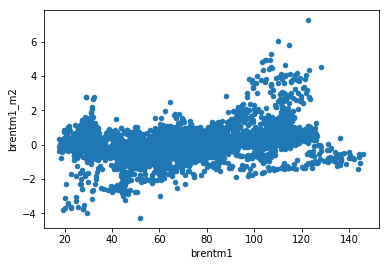

In [4]:
# df.resample('MS').mean().plot.scatter(x='brentm1', y='brentm1_m2')
df.plot.scatter(x='brentm1', y='brentm1_m2')

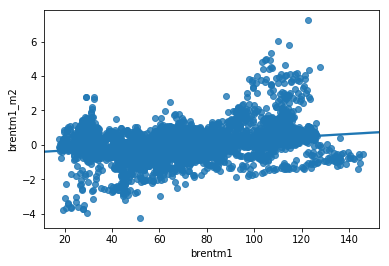

In [5]:
sns.regplot(data=df, x='brentm1', y='brentm1_m2')

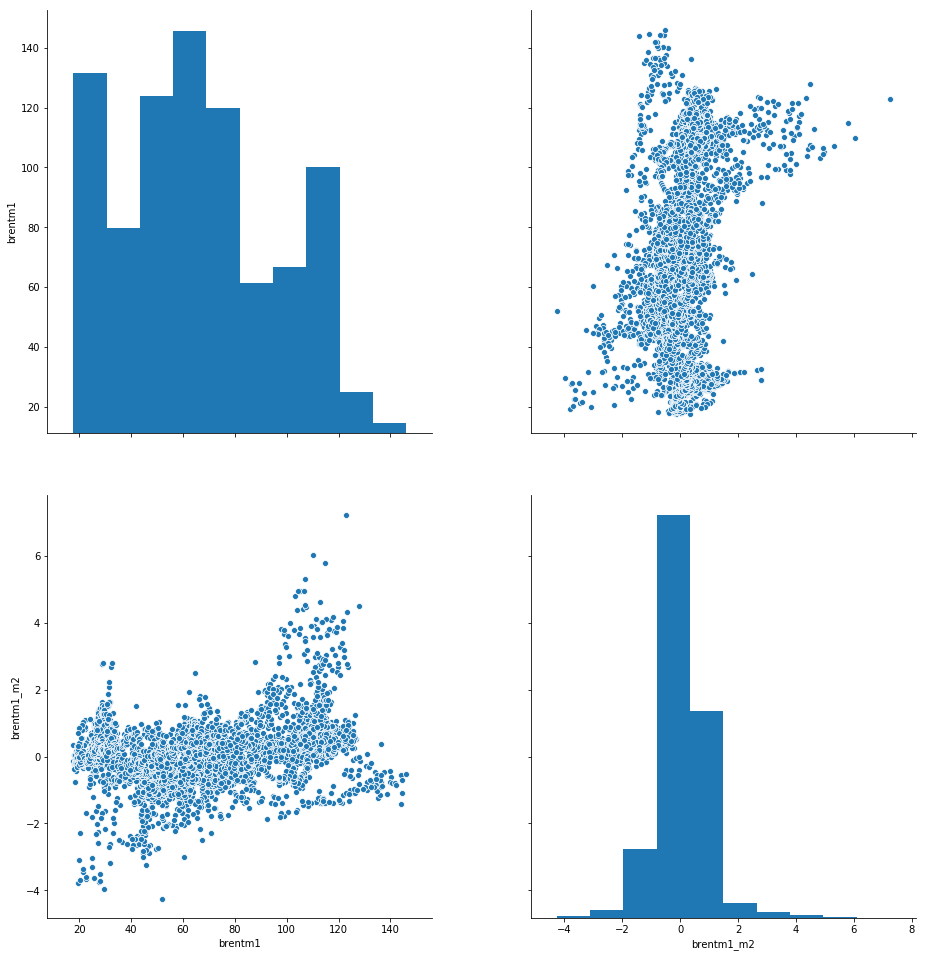

In [6]:
g=sns.pairplot(df)
g.fig.set_size_inches(15,15)

In [1]:
def ag_get_data(query):
    warnings.simplefilter('ignore', requests.packages.urllib3.exceptions.InsecureRequestWarning)
    params = {"Database": "OIL", "Query": query}
    resp = requests.post('https://TST-QDEV-AP1.petroineos.local:5001/genericdata/Fetch/', json=params, verify=False)
    json_result = resp.json()
    df = pd.DataFrame(json_result)
    return df

In [ ]:
outage = tsa.get('crude.iea.oecd_europe.commercial_stocks.kb.monthly')
demand = tsa.get('oil.ny_fed_report.demand.usd_bbl.weekly.52mav')
# dfl = tsa.get('price.platts.ice_brent_swap_spread.m01.usd_bbl.daily').resample('MS').mean()
dfl = tsa.get('price.platts.ice_brent_swap_spread.m01.usd_bbl.daily').resample('MS').mean()
corr = pd.concat([outage, dfl, demand], axis=1).bfill().loc['2012':]
corr.columns = ['stcks', 'brent', 'demand']

In [ ]:
import statsmodels.api as sm
import numpy as np

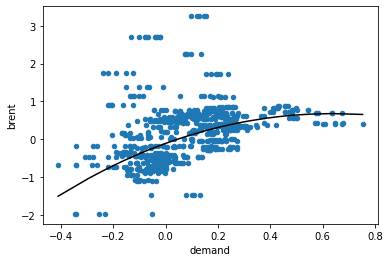

In [ ]:
import matplotlib.pyplot as plt
fitted = sm.formula.ols('brent ~ demand + np.log(demand+10)', data=corr[:'2022-01-01']).fit()
demand = corr.describe(percentiles=np.linspace(0, 1, 100))[3:-1]
corr.plot.scatter(x='demand', y='brent')
plt.plot(demand['demand'], fitted.predict(demand), color='black')

In [ ]:
corr[corr['brent']<-1.5]

stcks  brent    demand
2022-03-13  365159.831667 -1.528 -0.052480
2022-03-18  365159.831667 -1.528  0.091840
2022-04-03  370955.418333 -1.532 -0.050291
2022-04-08  370955.418333 -1.532 -0.038736

<AxesSubplot:xlabel='stcks', ylabel='resid'>

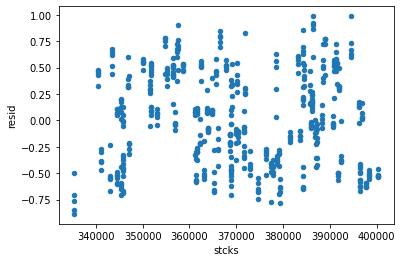

In [ ]:
# corr['brent'].cumsum().plot()
# fitted.predict(corr).cumsum().plot()
corr['resid'] = fitted.resid.shift(1)
corr[:'2020-1-1'].plot.scatter(x='stcks', y='resid')